# Installing Needed Libraries


In [1]:
# install needed libraries

!pip install nltk
!pip install spacy

!pip install numpy
!pip install pandas

!pip install matplotlib

!pip install wordcloud





In [2]:
!pip install tensorflow

# Imports

In [3]:


import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import string
import pandas as pd
import numpy as np
import spacy
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Importing the dataset

In [4]:


file_path = "/content/Game_of_Thrones_Script.csv"


# Read the CSV file into a Pandas DataFrame
dataframe = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it was read correctly
dataframe.head()


,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


# Get most frequent Sentences

In [5]:
# get most frequent sentences and their counts

def get_most_frequent_sentences(dataframe, n):
    # Get the most frequent sentences
    most_frequent_sentences = dataframe['Sentence'].value_counts().head(n)
    return most_frequent_sentences.index.tolist(), most_frequent_sentences.values.tolist()




# display the top 100 most frequent sentences and their frequencies

most_frequent_sentences, most_frequent_sentence_counts = get_most_frequent_sentences(dataframe, 100)
print("Top 100 Most Frequent Sentences:")
for i in range(len(most_frequent_sentences)):
    print(f"{most_frequent_sentences[i]}: {most_frequent_sentence_counts[i]}")


Top 100 Most Frequent Sentences:
No.: 103
Your Grace.: 56
Why?: 52
What?: 44
Yes.: 40
Thank you.: 26
What are you doing?: 24
Who are you?: 24
And?: 23
Good.: 20
Aye.: 20
What is it?: 20
No!: 19
What do you want?: 16
Hodor.: 16
Who?: 14
My lord.: 13
I don't know.: 13
Of course.: 13
Oh.: 12
I do.: 12
Why not?: 12
Where?: 11
I know.: 11
How?: 10
What are you doing here?: 10
Come on.: 10
Valar morghulis.: 9
Hmm.: 9
Please.: 9
I did.: 9
Yes, Your Grace.: 9
Yes, my lord.: 9
Go on.: 9
Where are you going?: 9
Come on!: 9
I can't.: 9
Never.: 8
Mmm.: 8
Come in.: 8
Come.: 8
EPISODE: 8
How many?: 8
Now!: 8
Don't.: 7
How do you know?: 7
Not yet.: 7
Hello.: 7
What's your name?: 7
Ser Jaime.: 7
Long may he reign.: 6
Lord Baelish.: 6
I will.: 6
No, my lord.: 6
Open the gate!: 6
I'm sorry.: 6
My lady.: 6
Jon Snow.: 6
Khaleesi.: 6
Nothing.: 6
CREDITS: 6
Mm-hmm.: 6
For the night is dark and full of terrors.: 6
Go!: 6
What's this?: 6
It is.: 6
Come here.: 5
Where will you go?: 5
Your Grace?: 5
Three.: 5
F

# Data Cleaning

In [6]:
# check for missing and null values
dataframe.isnull().sum()


Release Date     0
Season           0
Episode          0
Episode Title    0
Name             3
Sentence         1
dtype: int64

Dropping null values and unnecessary columns

In [7]:
# Drop the release date column
dataframe = dataframe.drop(columns=['Release Date'])


# Drop the rows with null values in the dataframe
dataframe = dataframe.dropna()

# check one more time for the missing values

dataframe.isnull().sum()


Season           0
Episode          0
Episode Title    0
Name             0
Sentence         0
dtype: int64

To Lowercase

In [8]:

#dataframe['Sentence'] = dataframe['Sentence'].str.lower()
#dataframe


Expand Contractions

In [9]:
contractions = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "'d": " would",
    "'ll": " will",
    "'m": " am",
    "'re": " are",
    "'ve": " have",
    "n't": " not",
    "don't": "do not",
    "won't": "will not",
    "what's": "what is",
    "let's": "let us",
    "who's": "who is",
    "where's": "where is",
    "when's": "when is",
    "how's": "how is",
    "it's": "it is",
    "that's": "that is",
    "there's": "there is",
    "here's": "here is",
    "who'd": "who would",
    "he's": "he is",
    "he'd": "he would",
    "she's": "she is",
    "she'd": "she would",
    "it'd": "it would",
    "they're": "they are",
    "they'd": "they would",
    "we're": "we are",
    "we'd": "we would",
    "you're": "you are",
    "you'd": "you would",
    "i'm": "i am",
    "i'd": "i would",
    "i've": "i have",
    "i'll": "i will"
}

def expand_contraction(word):
    if word in contractions:
        return contractions[word]
    return word

def expand_contractions(word):
    for contraction in contractions:
         if contraction in word:
            #return contractions[contraction] # return the word without the contraction and return the contraction substitution
            return word.replace(contraction, contractions[contraction]) # if the word is not a contraction
        # just return it back since it is not a contraction

    return word

# apply the first function to the dataframe
#dataframe['Sentence'] = dataframe['Sentence'].apply(lambda x: ' '.join(expand_contraction(word) for word in x.split()))

# apply the second function to the dataframe
#dataframe['Sentence'] = dataframe['Sentence'].apply(lambda x: ' '.join(expand_contractions(word) for word in x.split()))





Remove Stop Words

In [10]:
# remove stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(sentence):
    if isinstance(sentence, str):
        return ' '.join([word for word in sentence.split() if word not in stop_words])
    else:
        return sentence

#dataframe['Sentence'] = dataframe['Sentence'].apply(remove_stopwords)


Remove Punctuation

In [11]:
# remove punctuation

def remove_punctuation(sentence):
    if isinstance(sentence, str):
        return sentence.translate(str.maketrans('', '', string.punctuation))
    else:
        return sentence


#dataframe['Sentence'] = dataframe['Sentence'].apply(remove_punctuation)


# Check for additional words that would not add meaning to the dataset

In [12]:
# create a list with the words that i found in the code block above
words_to_remove = ['would', 'you','know','like', 'me','want', 'it', 'us', 'get','think','could','take','need','see','him','go','make','them','here','look','yes','no','going','thank']

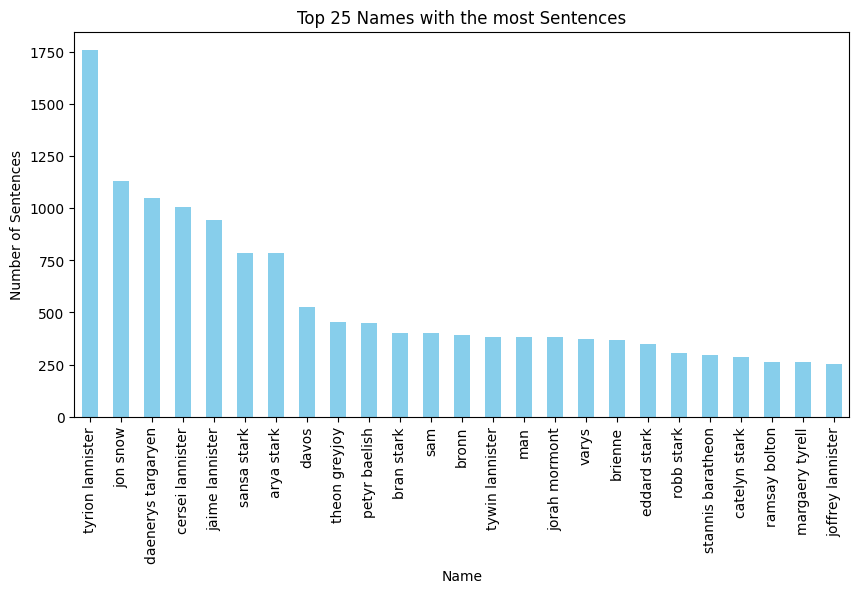

In [13]:
# get top 25 Names with the most Sentences

top_25_names = dataframe['Name'].value_counts().head(25)
top_25_names

# visulaize them in a plot

top_25_names.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 25 Names with the most Sentences')
plt.xlabel('Name')
plt.ylabel('Number of Sentences')
plt.show()



# Make the rest of the characters as one man

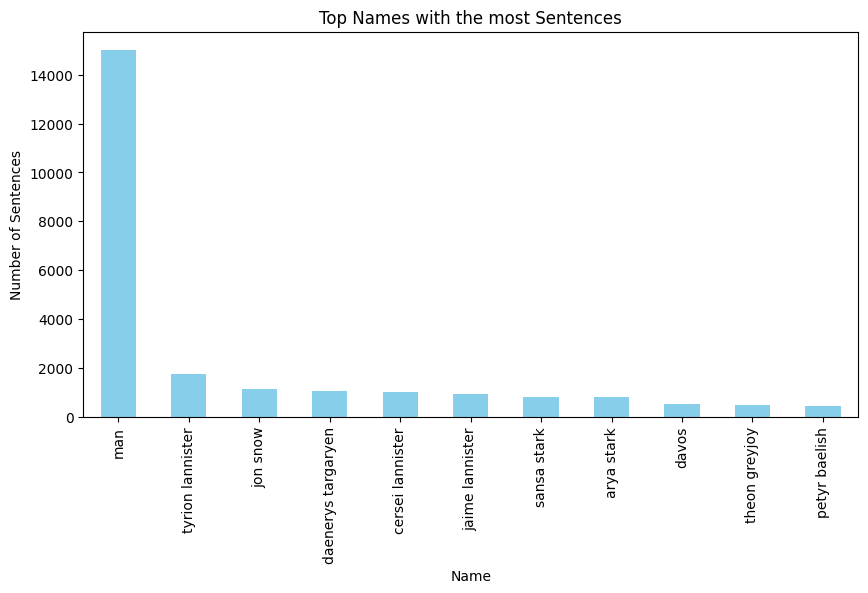

In [14]:
# Get the names after the top 25
names_to_change = dataframe['Name'].value_counts().index[10:]
names_to_change
# Change the names to "man"
dataframe.loc[dataframe['Name'].isin(names_to_change), 'Name'] = 'man'


# Get the top 25 names after the change

top_25_names = dataframe['Name'].value_counts().head(25)
top_25_names.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top Names with the most Sentences')
plt.xlabel('Name')
plt.ylabel('Number of Sentences')
plt.show()

# N-Grams

Bigrams

In [15]:
# get bigrams

from nltk import bigrams
from nltk import FreqDist

def get_bigrams(sentence):
    if isinstance(sentence, str):
        return list(bigrams(sentence.split()))
    else:
        return sentence

dataframe['Bigrams'] = dataframe['Sentence'].apply(get_bigrams)
# Transform lists of tuples into strings
dataframe['Bigrams'] = dataframe['Bigrams'].apply(lambda x: ' '.join(['_'.join(tup) for tup in x]))


In [16]:
# prompt: tell who are the top 5 character that speak the most sentences in the dataset

top_characters = dataframe['Name'].value_counts()
print(top_characters)


Name
man                   15017
tyrion lannister       1760
jon snow               1133
daenerys targaryen     1048
cersei lannister       1005
jaime lannister         945
sansa stark             784
arya stark              783
davos                   528
theon greyjoy           455
petyr baelish           449
Name: count, dtype: int64


In [17]:
# prompt: make a new dataframe where only the top 5 speaking characters are there, except for man

new_dataframe = dataframe[dataframe['Name'].isin(top_characters.index)]

new_dataframe

,Season,Episode,Episode Title,Name,Sentence,Bigrams
0,Season 1,Episode 1,Winter is Coming,man,What do you expect? They're savages. One lot s...,What_do do_you you_expect? expect?_They're The...
1,Season 1,Episode 1,Winter is Coming,man,I've never seen wildlings do a thing like this...,I've_never never_seen seen_wildlings wildlings...
2,Season 1,Episode 1,Winter is Coming,man,How close did you get?,How_close close_did did_you you_get?
3,Season 1,Episode 1,Winter is Coming,man,Close as any man would.,Close_as as_any any_man man_would.
4,Season 1,Episode 1,Winter is Coming,man,We should head back to the wall.,We_should should_head head_back back_to to_the...
...,...,...,...,...,...,...
23906,Season 8,Episode 6,The Iron Throne,man,I think we can all agree that ships take prece...,I_think think_we we_can can_all all_agree agre...
23907,Season 8,Episode 6,The Iron Throne,man,I think that's a very presumptuous statement.,I_think think_that's that's_a a_very very_pres...
23908,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,I_once once_brought brought_a a_jackass jackas...
23909,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!,The_Queen Queen_in in_the the_North!


In [18]:

df = new_dataframe.copy()
df

,Season,Episode,Episode Title,Name,Sentence,Bigrams
0,Season 1,Episode 1,Winter is Coming,man,What do you expect? They're savages. One lot s...,What_do do_you you_expect? expect?_They're The...
1,Season 1,Episode 1,Winter is Coming,man,I've never seen wildlings do a thing like this...,I've_never never_seen seen_wildlings wildlings...
2,Season 1,Episode 1,Winter is Coming,man,How close did you get?,How_close close_did did_you you_get?
3,Season 1,Episode 1,Winter is Coming,man,Close as any man would.,Close_as as_any any_man man_would.
4,Season 1,Episode 1,Winter is Coming,man,We should head back to the wall.,We_should should_head head_back back_to to_the...
...,...,...,...,...,...,...
23906,Season 8,Episode 6,The Iron Throne,man,I think we can all agree that ships take prece...,I_think think_we we_can can_all all_agree agre...
23907,Season 8,Episode 6,The Iron Throne,man,I think that's a very presumptuous statement.,I_think think_that's that's_a a_very very_pres...
23908,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,I_once once_brought brought_a a_jackass jackas...
23909,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!,The_Queen Queen_in in_the the_North!


In [19]:
top_speakers = dataframe['Name'].value_counts().index.tolist()
top_speakers

['man',
 'tyrion lannister',
 'jon snow',
 'daenerys targaryen',
 'cersei lannister',
 'jaime lannister',
 'sansa stark',
 'arya stark',
 'davos',
 'theon greyjoy',
 'petyr baelish']

In [20]:

def create_question_answer_pairs(df,top_speakers):
    """
    Create question-answer pairs from a DataFrame of sentences.

    Parameters:
    - df: DataFrame containing sentences.

    Returns:
    - Two lists: one containing questions and the other containing corresponding answers.
    """
    questions = []
    answers = []
    speakers = []
    for i in range(len(df) - 1):
      speaker = df.iloc[i+1]['Name']
      if speaker in top_speakers:
        question = df.iloc[i]['Sentence']
        answer = df.iloc[i + 1]['Sentence']
        speaker = df.iloc[i + 1]['Name']
        questions.append(question)
        answers.append(answer)
        speakers.append(speaker)
    return questions, answers, speakers

questions,answers, speakers = create_question_answer_pairs(dataframe,top_speakers)


In [21]:
data = df.copy()


In [22]:
!pip install transformers[torch] tokenizers datasets evaluate rouge_score sentencepiece huggingface_hub --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105

In [23]:
import nltk
import evaluate
import numpy as np
import datasets
from datasets import load_dataset, Dataset
from transformers import T5Tokenizer, DataCollatorForSeq2Seq
from transformers import T5ForConditionalGeneration, Seq2SeqTrainingArguments, Seq2SeqTrainer

In [24]:
# Load the tokenizer, model, and data collator
MODEL_NAME = "google/flan-t5-base"

tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [25]:
# prompt: turn the questions and answers into a dataframe with 2 columns, question and answer

import pandas as pd

# Create a list of tuples containing the questions and answers
data = []
for i in range(len(questions)):
  data.append((questions[i], answers[i], speakers[i]))

# Create a DataFrame from the list of tuples
df = pd.DataFrame(data, columns=['question', 'answer','speaker'])

# Print the DataFrame
df.head()


,question,answer,speaker
0,What do you expect? They're savages. One lot s...,I've never seen wildlings do a thing like this...,man
1,I've never seen wildlings do a thing like this...,How close did you get?,man
2,How close did you get?,Close as any man would.,man
3,Close as any man would.,We should head back to the wall.,man
4,We should head back to the wall.,Do the dead frighten you?,man


In [26]:
import pandas as pd
from datasets import Dataset, DatasetDict



# Convert DataFrame to Dataset object
dataset = Dataset.from_pandas(df)

# Remove the index column added by default


# Create DatasetDict with only one dataset
dataset_dict = DatasetDict({
    'train': dataset
})

# Print the DatasetDict to verify
print(dataset_dict)


DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'speaker'],
        num_rows: 23906
    })
})


In [27]:
dataset_dict = dataset_dict["train"].train_test_split(test_size=0.2)

In [28]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['question', 'answer', 'speaker'],
        num_rows: 19124
    })
    test: Dataset({
        features: ['question', 'answer', 'speaker'],
        num_rows: 4782
    })
})

In [29]:
# We prefix our tasks with "answer the question"
prefix = "Please answer this question: "

# Define the preprocessing function



# We prefix our tasks with "answer the question as {speaker}:"
def preprocess_function(examples):
    # The "inputs" are the tokenized answer:
    inputs = [f"Please answer this question as {char}: {q}" for q, char in zip(examples["question"], examples["speaker"])]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True)
    # The "labels" are the tokenized outputs:
    labels = tokenizer(text_target=examples["answer"], max_length=512, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Map the preprocessing function across our dataset
tokenized_dataset = dataset_dict.map(preprocess_function, batched=True)


Map:   0%|          | 0/19124 [00:00<?, ? examples/s]

Map:   0%|          | 0/4782 [00:00<?, ? examples/s]

In [30]:
# Map the preprocessing function across our dataset
tokenized_dataset = dataset_dict.map(preprocess_function, batched=True)

Map:   0%|          | 0/19124 [00:00<?, ? examples/s]

Map:   0%|          | 0/4782 [00:00<?, ? examples/s]

In [31]:
nltk.download("punkt", quiet=True)
metric = evaluate.load("rouge")

In [32]:
def compute_metrics(eval_preds):
   preds, labels = eval_preds

   # decode preds and labels
   labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
   decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
   decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

   # rougeLSum expects newline after each sentence
   decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
   decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

   result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

   return result


In [33]:
%env PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

env: PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True


In [34]:
import os
print(os.environ.get('PYTORCH_CUDA_ALLOC_CONF'))


expandable_segments:True


In [35]:
# Global Parameters
L_RATE = 3e-4
BATCH_SIZE = 4
PER_DEVICE_EVAL_BATCH = 2
WEIGHT_DECAY = 0.01
SAVE_TOTAL_LIM = 3
NUM_EPOCHS = 4

# Set up training arguments
training_args = Seq2SeqTrainingArguments(
   output_dir="./results",
   evaluation_strategy="epoch",
   learning_rate=L_RATE,
   per_device_train_batch_size=BATCH_SIZE,
   per_device_eval_batch_size=PER_DEVICE_EVAL_BATCH,
   weight_decay=WEIGHT_DECAY,
   save_total_limit=SAVE_TOTAL_LIM,
   num_train_epochs=NUM_EPOCHS,
   predict_with_generate=True,
   push_to_hub=False,
   gradient_accumulation_steps=4,
)




/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [36]:
trainer = Seq2SeqTrainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_dataset["train"],
   eval_dataset=tokenized_dataset["test"],
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics
)



In [39]:
trainer.train()

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [40]:
trainer.save_model("./character_reply_model")


In [ ]:
last_checkpoint = "./results/checkpoint-1000"

finetuned_model = T5ForConditionalGeneration.from_pretrained(last_checkpoint)
tokenizer = T5Tokenizer.from_pretrained(last_checkpoint)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
my_question = "what is wrong with you?"
inputs = "Please answer to this question: " + my_question

In [ ]:
inputs = tokenizer(inputs, return_tensors="pt")
outputs = finetuned_model.generate(**inputs)
answer = tokenizer.decode(outputs[0])
from textwrap import fill
answer
#print(fill(answer, width=80))

ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [41]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the fine-tuned model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("./character_reply_model")
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

def generate_response(question, character):
    prompt = f"Please answer this question as {character}: {question}"
    inputs = tokenizer.encode(prompt, return_tensors="pt")
    outputs = model.generate(inputs, max_length=50, num_return_sequences=1)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Example usage
question = "how many dragons does the queen have?"
character = "man"
response = generate_response(question, character)
print(response)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


I think about the way the king's king's king's king's king's king's king's king.


In [45]:
question = "where is bran?"
character = "jon snow"
response = generate_response(question, character)
print(response)

He's gone.


In [46]:
question = "who is an imp?"
character = "tyrion lannister"
response = generate_response(question, character)
print(response)

Imps.


In [47]:
question = "valar morghulis"
character = "arya stark"
response = generate_response(question, character)
print(response)

Valar dohaeris.


In [48]:
question = "valar morghulis"
character = "daenerys targaryen"
response = generate_response(question, character)
print(response)

Is that a good man?


In [49]:
question = "you are guilty"
character = "tyrion lannister"
response = generate_response(question, character)
print(response)

I am guilty of treason


In [51]:
question = "you are a traitor"
character = "theon greyjoy"
response = generate_response(question, character)
print(response)

I am


In [60]:
question = "who killed your children?"
character = "cersei lannister"
response = generate_response(question, character)
print(response)

No one.


In [53]:
question = "bend the knee"
character = "jon snow"
response = generate_response(question, character)
print(response)

I'm sorry, my lord.


In [57]:
question = "where is arya?"
character = "sansa stark"
response = generate_response(question, character)
print(response)

Where are you going?


In [59]:
question = "who is jaime lannister?"
character = "man"
response = generate_response(question, character)
print(response)

I'm not sure. I'm not sure.


In [63]:
question = "who is jaime lannister?"
character = "jon snow"
response = generate_response(question, character)
print(response)

Gregor Tywin Lannister.


In [64]:
question = "who injured you?"
character = "tyrion lannister"
response = generate_response(question, character)
print(response)

I was a drunken fool.


In [68]:
question = "are you no one?"
character = "arya stark"
response = generate_response(question, character)
print(response)

No one.


In [70]:
question = "you like sansa don't you?"
character = "petyr baelish"
response = generate_response(question, character)
print(response)

I do


In [74]:
question = "you will be sentenced to death"
character = "petyr baelish"
response = generate_response(question, character)
print(response)

I am not guilty of murder I am guilty of treason I am guilty of treason I am guilty of treason I am guilty of treason I am guilty of treason I am guilty


In [75]:
question = "you will be sentenced to death"
character = "man"
response = generate_response(question, character)
print(response)

I will not be sentenced to death


In [81]:
question = "Who is your father?"
character = "man"
response = generate_response(question, character)
print(response)

I don't know.


In [82]:
question = "i am sorry my lord"
character = "jaime lannister"
response = generate_response(question, character)
print(response)

You're not sorry


In [85]:
question = "help me"
character = "man"
response = generate_response(question, character)
print(response)

I'm not a liar


In [88]:
question = "who is the oldest stark?"
character = "arya stark"
response = generate_response(question, character)
print(response)

No one.


In [89]:
question = "who is the oldest stark?"
character = "sansa stark"
response = generate_response(question, character)
print(response)

The eldest.


In [90]:
question = "what happened to you?"
character = "sansa stark"
response = generate_response(question, character)
print(response)

I was stabbed in the back.


In [91]:
question = "hold the door"
character = "sansa stark"
response = generate_response(question, character)
print(response)

I'm not going to let you in


In [96]:
question = "What killed the red lady?"
character = "man"
response = generate_response(question, character)
print(response)

She was a wildling.


In [98]:
question = "who are you?"
character = "jon snow"
response = generate_response(question, character)
print(response)

Jon Snow.


In [99]:
question = "the white walkers, what about them?"
character = "jon snow"
response = generate_response(question, character)
print(response)

They're not going to die.


In [54]:
df.speaker.value_counts()

speaker
man                   15016
tyrion lannister       1760
jon snow               1133
daenerys targaryen     1048
cersei lannister       1005
jaime lannister         945
sansa stark             784
arya stark              783
davos                   528
theon greyjoy           455
petyr baelish           449
Name: count, dtype: int64